In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.pipeline import Pipeline


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


In [109]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contest/Titanic_data/train.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [112]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [113]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [114]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


In [115]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


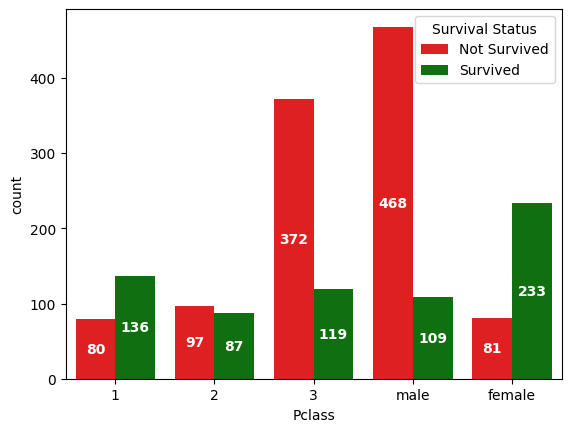

In [116]:
ax=sns.countplot(x='Pclass',data=df,hue='Survived',palette={0: 'red',1:'green'})
ax = sns.countplot(x='Sex', data=df, hue='Survived', palette={0: 'red', 1: 'green'})
ax.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=10, fontweight='bold')
plt.show()

In [117]:
features=['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']
target=['Survived']

In [118]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

<Axes: >

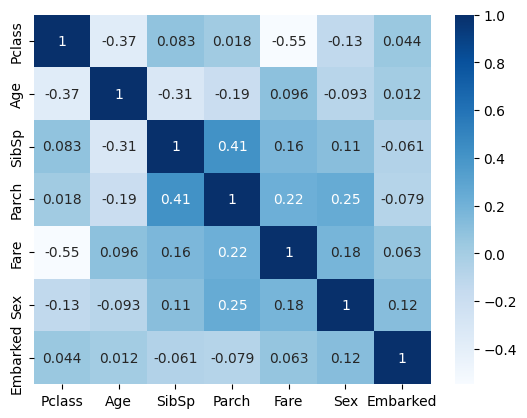

In [119]:
sns.heatmap(df[features].corr(),annot=True,cmap='Blues')

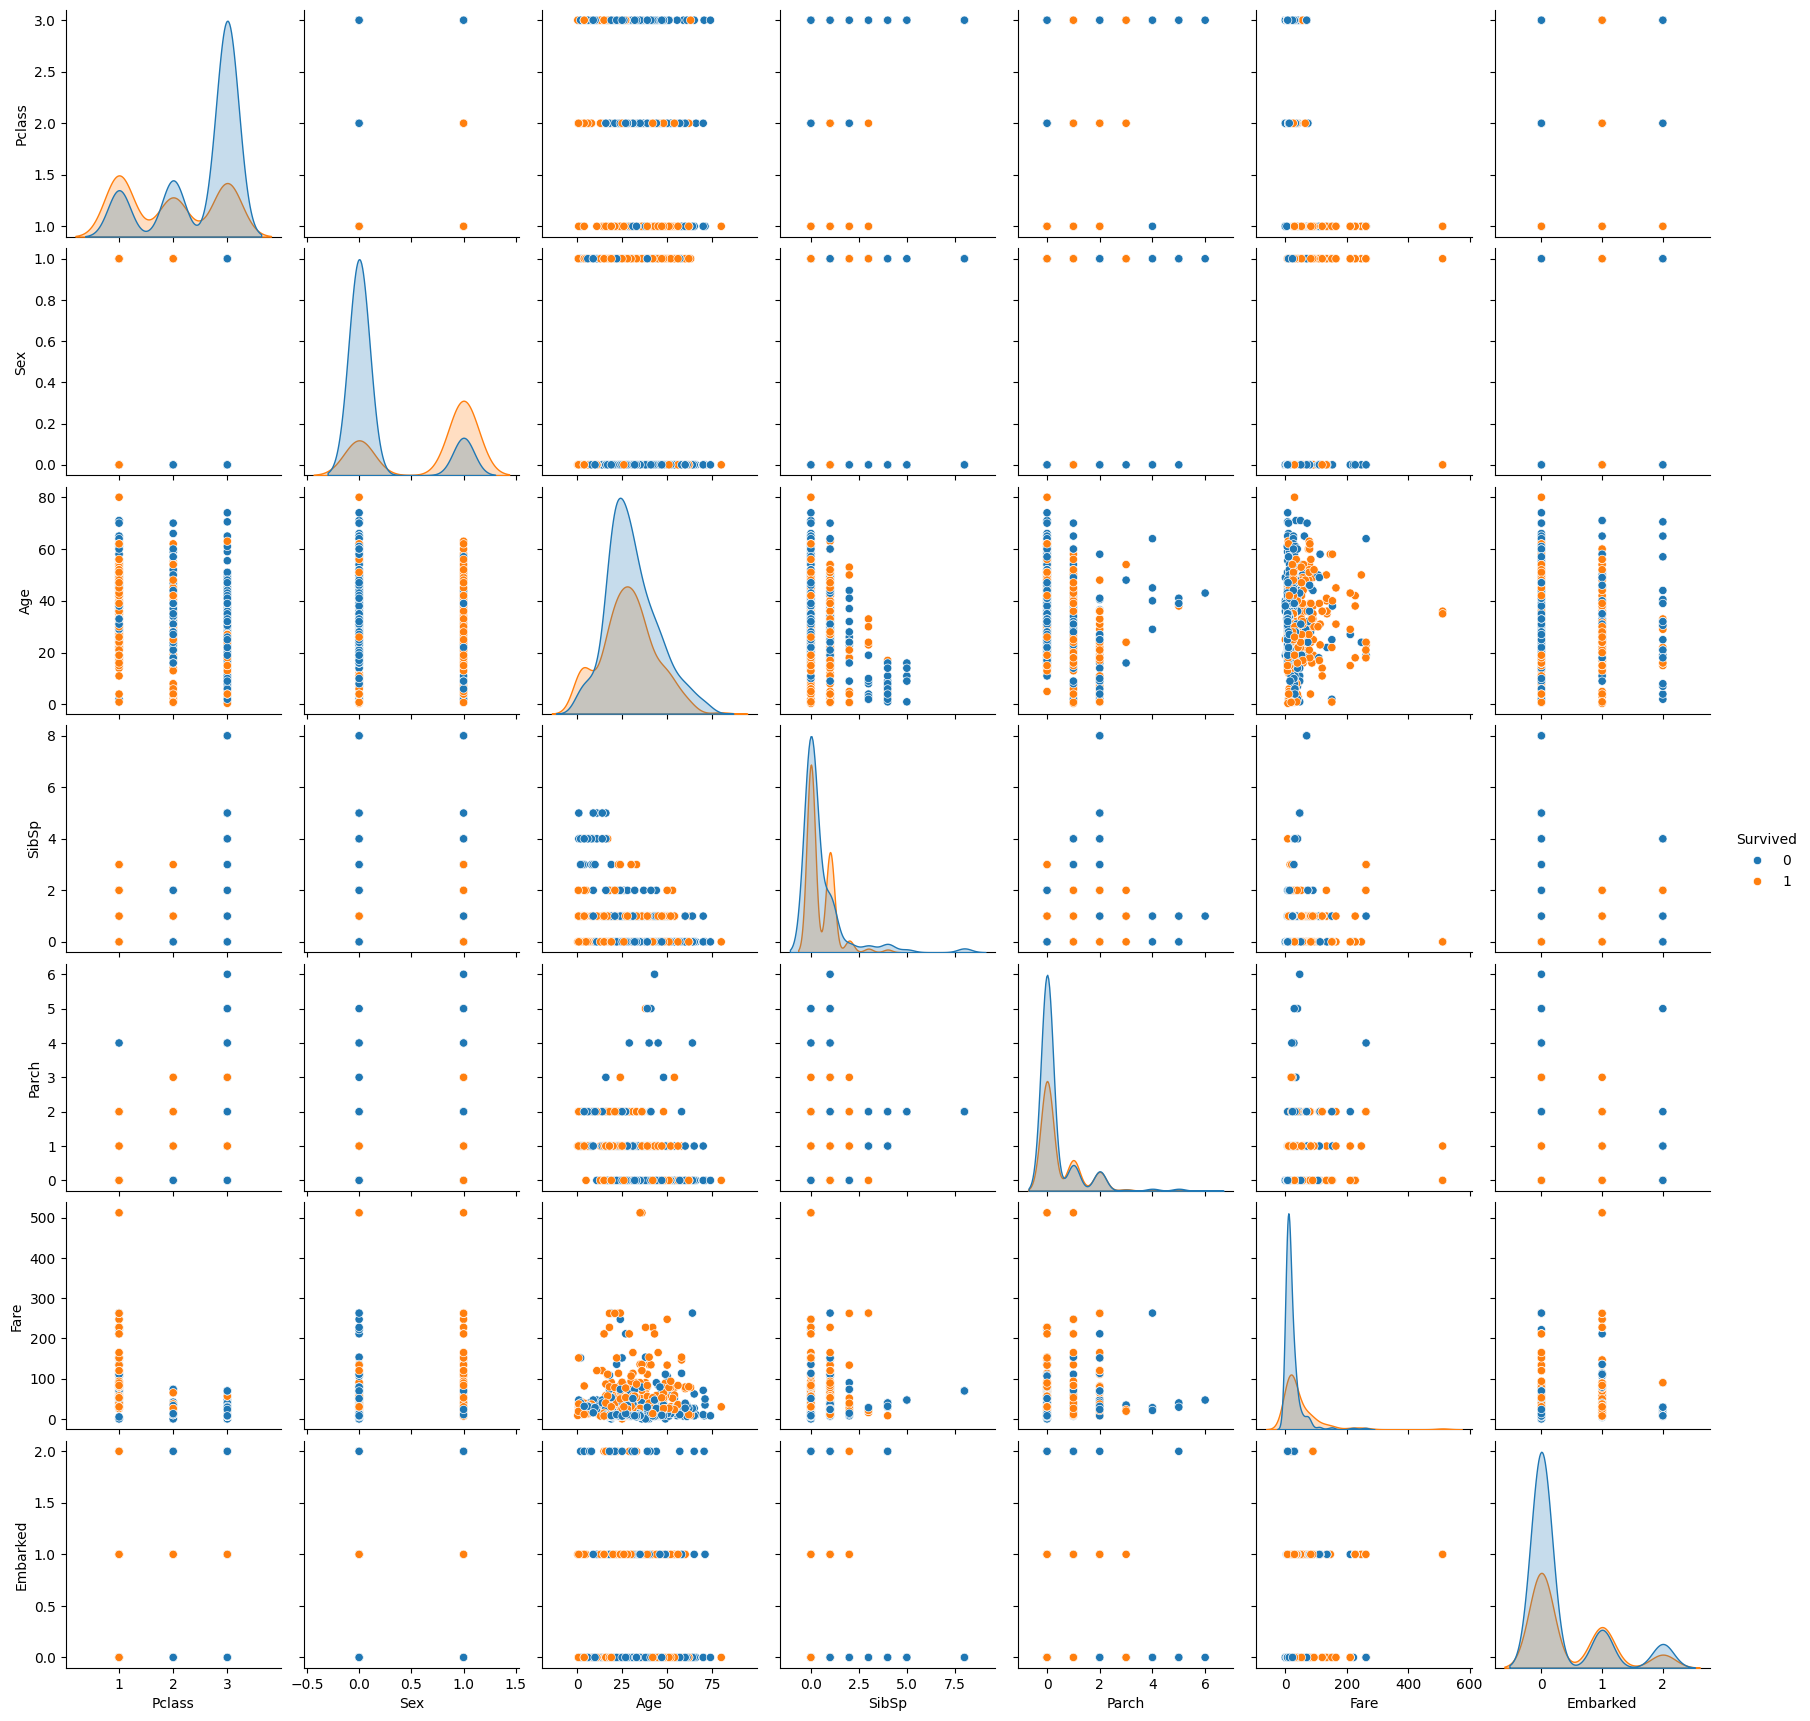

In [120]:
sns.pairplot(df,hue='Survived')

In [121]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

In [122]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [125]:
X_train,X_cv,y_train,y_cv=train_test_split(df[features],df[target],test_size=0.2,random_state=42)

In [126]:
n_estimarors=[50,100,200,300,400,500]
learning_rate=[0.05,0.1,0.2,0.3]
max_depth=[3,4,5,6,7]

In [141]:
param_grid={
    'n_estimators':[50,100,200,300,400,500],
    'learning_rate':[0.01,0.05,0.1,0.2,0.3],
    'max_depth':[3,4,5,6,7],
}
model=XGBClassifier()
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='accuracy',verbose=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 100, 200, 300, 400, 500],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [142]:
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [159]:
model=XGBClassifier(n_estimators=50,learning_rate=0.2,max_depth=3)
model.fit(X_train,y_train,eval_set=[(X_cv,y_cv)],verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [160]:
print(model.score(X_train,y_train))
print(model.score(X_cv,y_cv))

0.8862359550561798
0.8212290502793296


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

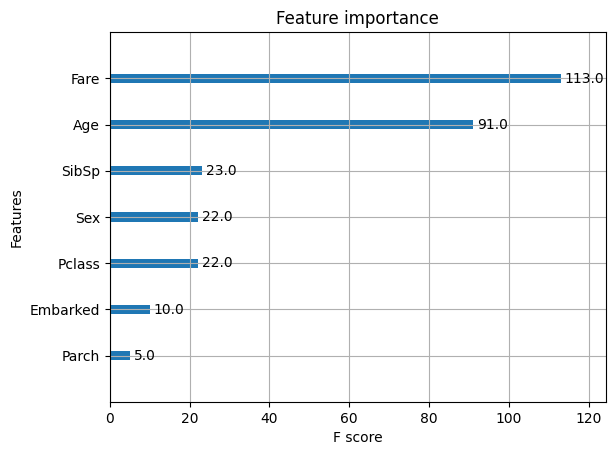

In [161]:
plot_importance(model)

In [185]:
features=['Pclass','Age','SibSp','Fare','Sex']

In [186]:
X_train,X_cv,y_train,y_cv=train_test_split(df[features],df[target],test_size=0.2,random_state=42)

In [187]:
model=XGBClassifier(n_estimators=50,learning_rate=0.2,max_depth=3)
model.fit(X_train,y_train,eval_set=[(X_cv,y_cv)],verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [188]:
print(model.score(X_train,y_train))
print(model.score(X_cv,y_cv))

0.8806179775280899
0.8100558659217877


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

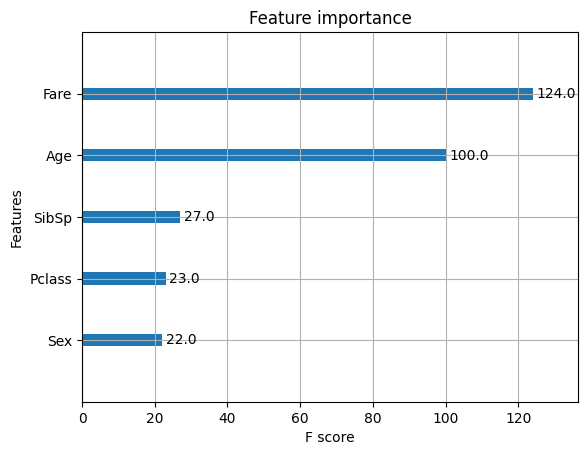

In [189]:
plot_importance(model)

# Test

In [200]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contest/Titanic_data/test.csv')

In [201]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [202]:
PassengerId=df_test['PassengerId']

In [203]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [195]:
df_test['Sex']=df_test['Sex'].map({'male':0,'female':1})
df_test['Embarked']=df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [196]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [197]:
X_test=df_test[features]

In [198]:
ypred=model.predict(X_test)

In [199]:
output=pd.DataFrame({'PassengerId':PassengerId,'Survived':ypred})
output.to_csv('submission.csv',index=False)

In [204]:
pickle.dump(model,open('model.pkl','wb'))